任务:基于zgpa_trainlcsv数据，建立RNN模型，预测股价:
1.完成数据预处理，将序列数据转化为可用于RNN输入的数据
2.对新数据zgpa_test.csv进行预测，可视化结果
3.存储预测结果，并观察局部预测结果
备注:模型结构:单层RNN，输出有5个神经元;每次使用前8个数据预测第9个数据

In [4]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('zgpa_train.csv')
data.head()
# 日期，开盘价，最高，最低，收盘价，交易量

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [5]:
price = data.loc[:,'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [6]:
# 归一化处理
price_norm = price/max(price)
print(price_norm)

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64


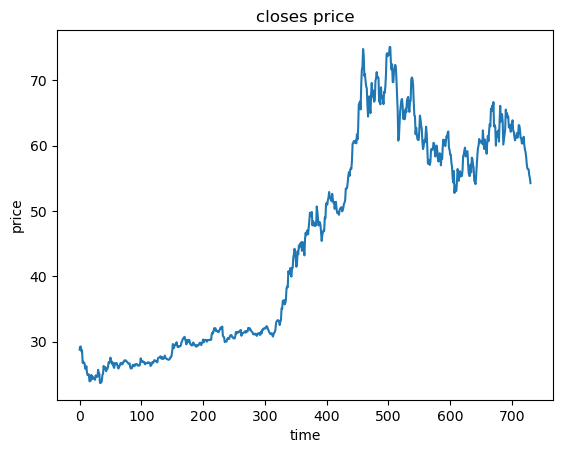

In [7]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.plot(price)
plt.title('closes price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

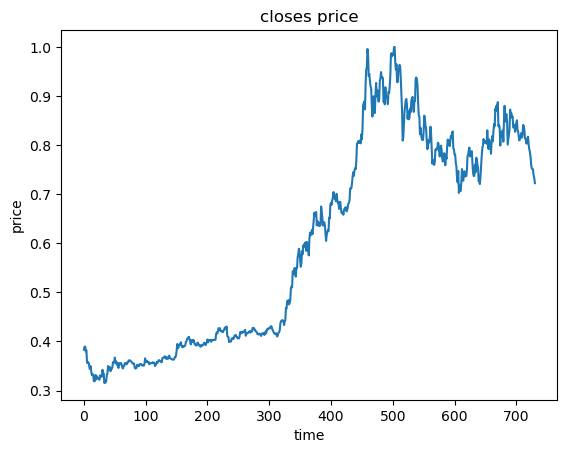

In [8]:
fig1 = plt.figure()
plt.plot(price_norm)
plt.title('closes price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [9]:
# define X and y
# define method to extract X and y
def extract_data(data,time_step):
    X = []
    y = []
    #0,1,2,3...9:10个样本;time_step=8;0,1...7;1,2...8;2,3...9三组(两组样本)
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X=np.array(X)
    y=np.array(y)
    X=X.reshape(X.shape[0],X.shape[1],1)
    return X,y

In [10]:
time_step = 8

In [11]:
# define X and y
X,y = extract_data(price_norm,time_step)
print(X[0,:,:])
print(y)

[[0.38327341]
 [0.38926621]
 [0.38966573]
 [0.37954455]
 [0.3818085 ]
 [0.35637235]
 [0.35876948]
 [0.35583966]]
[0.35583966 0.34531895 0.34358769 0.34944733 0.33639632 0.33133573
 0.33226795 0.33280064 0.31908377 0.31895059 0.32001598 0.33173525
 0.32307897 0.32893861 0.32454388 0.3254761  0.32481023 0.32174724
 0.33093621 0.32987082 0.32813957 0.32827274 0.34225596 0.3359968
 0.33479824 0.31548808 0.31735251 0.31615395 0.31948329 0.33173525
 0.33439872 0.34998002 0.34332135 0.34665069 0.34771607 0.33919297
 0.34318817 0.34412039 0.34744973 0.35770409 0.35597283 0.35757091
 0.36702624 0.35730457 0.35943534 0.35330936 0.35677187 0.34878146
 0.34598482 0.35583966 0.35344254 0.35490744 0.35597283 0.35251032
 0.3475829  0.34478626 0.34944733 0.34998002 0.35477427 0.35623918
 0.35583966 0.35317619 0.35504062 0.35876948 0.35890265 0.36156612
 0.36023439 0.3611666  0.35943534 0.35850313 0.35650553 0.35477427
 0.35504062 0.35530696 0.34798242 0.34478626 0.34518578 0.34598482
 0.3521108  0.352

In [12]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
# add RNN layer
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation='relu'))
# add output layer
model.add(Dense(units=1,activation='linear'))
# configure the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X,y,batch_size=30,epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 2ms/step - loss: 0.6462
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4002
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2725
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1620
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0746
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 11/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 12/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 13/200
25/25 [=================

In [14]:
# make prediction based on the training data
y_train_predict=model.predict(X)*max(price)
y_train=y*max(price)
print(y_train_predict,y_train)

23/23 [==============================] - 0s 986us/step
[[26.959877]
 [26.654026]
 [26.6527  ]
 [26.207367]
 [25.825335]
 [26.047155]
 [25.612497]
 [25.096415]
 [24.887646]
 [24.960886]
 [24.369291]
 [24.008154]
 [23.86085 ]
 [24.476774]
 [24.399828]
 [24.594242]
 [24.476013]
 [24.429846]
 [24.406197]
 [24.185688]
 [24.536316]
 [24.717308]
 [24.700546]
 [24.575848]
 [25.23168 ]
 [25.326565]
 [25.353868]
 [24.365353]
 [23.885422]
 [23.66373 ]
 [23.715658]
 [24.393795]
 [24.81116 ]
 [25.7855  ]
 [25.91172 ]
 [26.004831]
 [26.11768 ]
 [25.71152 ]
 [25.662569]
 [25.699444]
 [25.850134]
 [26.452137]
 [26.678404]
 [26.751617]
 [27.270027]
 [27.055094]
 [27.008049]
 [26.66167 ]
 [26.697212]
 [26.387373]
 [26.009304]
 [26.343794]
 [26.459787]
 [26.569172]
 [26.674852]
 [26.576073]
 [26.27696 ]
 [25.94222 ]
 [26.024591]
 [26.121706]
 [26.40756 ]
 [26.632118]
 [26.715681]
 [26.58323 ]
 [26.556305]
 [26.743053]
 [26.847376]
 [27.025581]
 [27.034674]
 [27.07049 ]
 [27.00374 ]
 [26.925   ]
 [26.8003

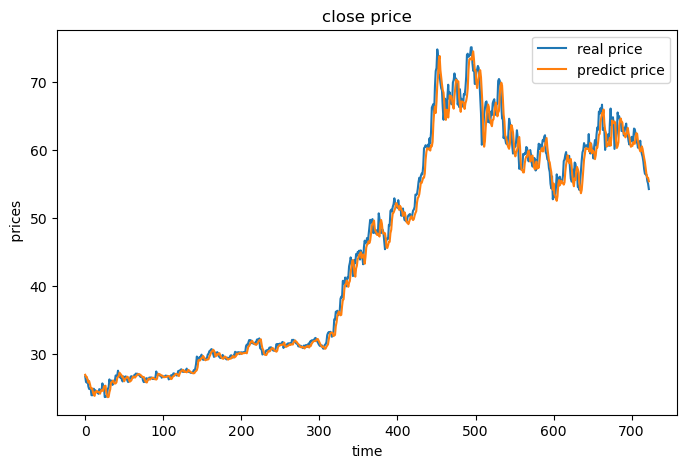

In [15]:
fig2=plt.figure(figsize=(8,5))#图形大小被设置为8英寸乘以5英寸。
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title("close price")
plt.xlabel("time")
plt.ylabel(" prices")
plt.legend()
plt.show()

In [16]:
data_test=pd.read_csv('zgpa_test.csv')
data_test.head()
price_test=data_test.loc[:,'close']
price_test.head()
price_test_norm=price_test/max(price)
X_test_norm,y_test_norm=extract_data(price_test_norm,time_step)
print(X_test_norm.shape,len(y_test_norm))

(219, 8, 1) 219


In [17]:
# make prediction based on the test data
y_test_predict=model.predict(X_test_norm)*max(price)
y_test=y_test_norm*max(price)

7/7 [==============================] - 0s 1ms/step


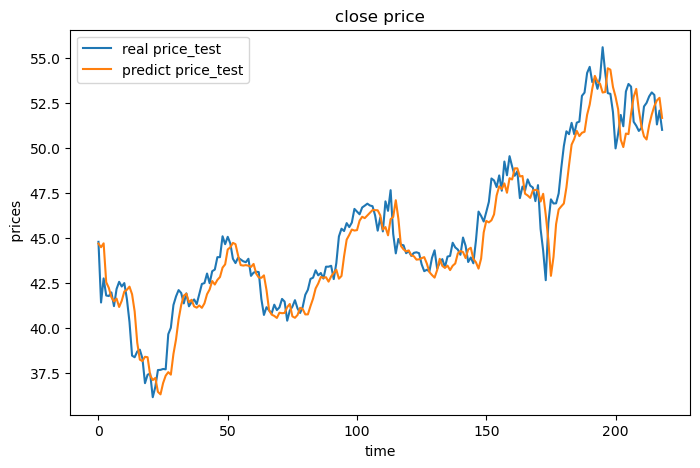

In [18]:
fig3=plt.figure(figsize=(8,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title("close price")
plt.xlabel("time")
plt.ylabel(" prices")
plt.legend()
plt.show()

In [22]:
import numpy as np
result_y_test = np.array(y_test).reshape(-1,1)
result_y_test_predict = y_test_predict
print(result_y_test.shape,result_y_test_predict.shape)
result = np.concatenate((result_y_test,result_y_test_predict),axis=1)
print(result.shape)
result = pd.DataFrame(result,columns=['real_price_test','predict_price_test'])
result.to_csv('zgpa_predict_test.csv')

(219, 1) (219, 1)
(219, 2)


RNN预测股价实战summary:
1、通过搭建RNN模型，实现了基于历史数据对次日股价的预测:
2、熟悉了RNN模型的数据格式结构:
3、掌握了数字序列的数据预处理方法;
4、实现了预测数据存储，通过可视化局部细节了解了RNN用于股价预测的局限性: 信息延迟
5、RNN模型参考资料: https://keras.io/layers/recurrent/